<a href="https://colab.research.google.com/github/ilEnzio/Sexy_In_The_City/blob/master/Photography_Dataset_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dnd_df = pd.read_csv("https://raw.githubusercontent.com/ilEnzio/Sexy_In_The_City/master/DND%20data_3.csv")

In [3]:

dnd_df.shape

(424, 8)

In [4]:
dnd_df.head()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
0,1/5/2017,99,yes,5/5/1976,32208,600,yes,butt
1,11/2/2017,99,yes,10/16/1984,32082,400,no,"butt, eyes"
2,6/29/2017,99,yes,7/22/1989,32080,320,no,"eyes, hair, legs"
3,1/23/2017,99,no,1/23/1971,32208,720,yes,boobs
4,4/25/2014,99,yes,6/6/1994,32034,NaN,NaN,NaN


In [5]:
dnd_df.describe()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
count,422,422,422,423,422,326,324,218
unique,321,10,4,413,82,69,5,65
top,10/14/2016,99,no,3/29/1965,32218,600,yes,butt
freq,4,289,302,2,27,83,211,77


In [6]:
dnd_df.describe(exclude="number")

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
count,422,422,422,423,422,326,324,218
unique,321,10,4,413,82,69,5,65
top,10/14/2016,99,no,3/29/1965,32218,600,yes,butt
freq,4,289,302,2,27,83,211,77


In [7]:
dnd_df.columns

Index(['Date_of_PreShoot', 'Session_Fee', 'Hair', 'DOB', 'zip_code',
       'Sales_total', 'Model Release', 'Favorite'],
      dtype='object')

In [8]:
dnd_df.isnull().sum()

Date_of_PreShoot      2
Session_Fee           2
Hair                  2
DOB                   1
zip_code              2
Sales_total          98
Model Release       100
Favorite            206
dtype: int64

In [9]:
# lets check out the Favorite feature
dnd_df["Favorite"].value_counts()

butt                 77
boobs                37
legs                 12
eyes                  9
butt, eyes            8
                     ..
back, eyes            1
butt, curves          1
waist                 1
abs                   1
boobs, eyes, lips     1
Name: Favorite, Length: 65, dtype: int64

In [10]:
dnd_df.loc[:, "Favorite"] = dnd_df.loc[:,"Favorite"].replace(to_replace=np.NaN, value="no preference")

In [11]:
dnd_df.isnull().sum()

Date_of_PreShoot      2
Session_Fee           2
Hair                  2
DOB                   1
zip_code              2
Sales_total          98
Model Release       100
Favorite              0
dtype: int64

In [12]:
dnd_df["Sales_total"].dropna()

0       600
1       400
2       320
3       720
5      1320
       ... 
414     160
419     720
421     600
422     750
423    1200
Name: Sales_total, Length: 326, dtype: object

In [13]:
# drop the rows where sale is Nan
# create a condition where sales is nan 
# drop those rows

# no_sales_condition = dnd_df["Sales_total"][:] == np.NaN

In [14]:
dnd_sales_df =dnd_df.dropna(subset=["Sales_total"])

In [15]:
dnd_df.shape

(424, 8)

In [16]:
dnd_sales_df.shape

(326, 8)

In [17]:
dnd_sales_df.isnull().sum()

Date_of_PreShoot    2
Session_Fee         2
Hair                2
DOB                 1
zip_code            0
Sales_total         0
Model Release       8
Favorite            0
dtype: int64

In [18]:
dnd_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 423
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date_of_PreShoot  324 non-null    object
 1   Session_Fee       324 non-null    object
 2   Hair              324 non-null    object
 3   DOB               325 non-null    object
 4   zip_code          326 non-null    object
 5   Sales_total       326 non-null    object
 6   Model Release     318 non-null    object
 7   Favorite          326 non-null    object
dtypes: object(8)
memory usage: 22.9+ KB


In [19]:
dnd_sales_df.head(10)

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
0,1/5/2017,99,yes,5/5/1976,32208,600,yes,butt
1,11/2/2017,99,yes,10/16/1984,32082,400,no,"butt, eyes"
2,6/29/2017,99,yes,7/22/1989,32080,320,no,"eyes, hair, legs"
3,1/23/2017,99,no,1/23/1971,32208,720,yes,boobs
5,9/14/2014,99,yes,11/3/1982,32257,1320,no,butt
6,9/5/2017,99,no,1/24/1996,32246,0,yes,eyes
7,8/14/2015,179,no,8/29/1977,32221,240,no,no preference
9,3/5/2015,99,yes,9/7/1979,32277,720,yes,boobs
10,1/21/2015,99,yes,8/4/1988,32258,680,yes,eyes
12,9/27/2014,99,no,11/10/1969,32216,600,yes,no preference


In [20]:
dnd_sales_df["Sales_total"].nunique()

69

In [21]:
# try converting to str, then to int
# test= dnd_sales_df["Sales_total"].astype(str).astype(int)
# test

In [22]:
# find this 866.7...
cond = dnd_sales_df["Sales_total"] == "866.7"

In [23]:
temp_df = dnd_sales_df[cond]
temp_df

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
133,8/2/2013,99,no,10/5/1980,32218,866.7,yes,no preference


In [24]:
dnd_sales_df.loc[133, "Sales_total"] = 860
dnd_sales_df.loc[133, "Sales_total"] 

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


860

In [25]:
# try again now that I got rid of decimal 
# test= dnd_sales_df["Sales_total"].astype(str).astype(int)
# test


In [26]:
# so now maybe there is a space?
cond2 = dnd_sales_df["Sales_total"] == " "
dnd_sales_df[cond2]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
222,10/21/2014,99,yes,11/29/1969,32073,,,no preference


In [27]:
# lets drop this row...

dnd_sales_df = dnd_sales_df.drop(labels=222)


In [28]:
# see if 222 is there
dnd_sales_df[cond2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite


In [29]:
#perfect so far; try to convert one more time 
dnd_sales_df["Sales_total"]= dnd_sales_df["Sales_total"].astype(str).astype(int)
dnd_sales_df.describe()

,Sales_total
count,325.000000
mean,738.095385
std,475.472871
min,0.000000
25%,580.000000
50%,600.000000
75%,950.000000
max,3000.000000


In [30]:
dnd_sales_df.head()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
0,1/5/2017,99,yes,5/5/1976,32208,600,yes,butt
1,11/2/2017,99,yes,10/16/1984,32082,400,no,"butt, eyes"
2,6/29/2017,99,yes,7/22/1989,32080,320,no,"eyes, hair, legs"
3,1/23/2017,99,no,1/23/1971,32208,720,yes,boobs
5,9/14/2014,99,yes,11/3/1982,32257,1320,no,butt


In [31]:
dnd_sales_df["Session_Fee"].nunique()

8

In [32]:
dnd_sales_df["Session_Fee"].value_counts()

99             230
25              51
179             33
249              4
0                2
100              1
amazon gift      1
89               1
Name: Session_Fee, dtype: int64

In [33]:
#ok lets change that amazon gift to 0
cond_gift = dnd_sales_df["Session_Fee"].str.strip() == "amazon gift"

In [34]:
dnd_sales_df[cond_gift]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
160,4/2/2014,amazon gift,yes,12/17/1980,32164,600,yes,butt


In [35]:
dnd_sales_df.loc[160, "Session_Fee"] =dnd_sales_df.loc[160, "Session_Fee"].strip()


In [36]:
# replace "amazon gift" with 0 
dnd_sales_df.loc[:, "Session_Fee"] = dnd_sales_df.loc[:,"Session_Fee"].replace(to_replace="amazon gift", value="0")

In [37]:
# check to see if its gone
dnd_sales_df[cond_gift]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
160,4/2/2014,0,yes,12/17/1980,32164,600,yes,butt


In [38]:
dnd_sales_df["Session_Fee"].value_counts()

99     230
25      51
179     33
249      4
0        3
100      1
89       1
Name: Session_Fee, dtype: int64

In [39]:
dnd_sales_df["Session_Fee"].isnull().sum()


2

In [40]:
cond_nan = dnd_sales_df["Session_Fee"].isnull() == True
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,NaN,NaN,NaN,2/8/1983,32211,1200,yes,no preference
51,NaN,NaN,NaN,8/24/1979,32225,600,yes,boobs


In [41]:
dnd_sales_df.loc[33, "Session_Fee"] = "179"
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,NaN,179,NaN,2/8/1983,32211,1200,yes,no preference
51,NaN,NaN,NaN,8/24/1979,32225,600,yes,boobs


In [42]:
dnd_sales_df.loc[51, "Session_Fee"] = "99"
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,NaN,179,NaN,2/8/1983,32211,1200,yes,no preference
51,NaN,99,NaN,8/24/1979,32225,600,yes,boobs


In [43]:
dnd_sales_df.loc[:, "Hair"] = dnd_sales_df.loc[:, "Hair"].replace(to_replace=np.NaN, value="no")
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,NaN,179,no,2/8/1983,32211,1200,yes,no preference
51,NaN,99,no,8/24/1979,32225,600,yes,boobs


In [44]:
dnd_sales_df.loc[33, "Date_of_PreShoot"] = "3/22/2017"
dnd_sales_df.loc[51, "Date_of_PreShoot"] = "1/30/2016"
dnd_sales_df[cond_nan]

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
33,3/22/2017,179,no,2/8/1983,32211,1200,yes,no preference
51,1/30/2016,99,no,8/24/1979,32225,600,yes,boobs


In [45]:
# change Session_Fee
dnd_sales_df["Session_Fee"]= dnd_sales_df["Session_Fee"].astype(str).astype(int)
dnd_sales_df.describe()

,Session_Fee,Sales_total
count,325.000000,325.000000
mean,96.661538,738.095385
std,43.553670,475.472871
min,0.000000,0.000000
25%,99.000000,580.000000
50%,99.000000,600.000000
75%,99.000000,950.000000
max,249.000000,3000.000000


In [46]:
dnd_sales_df["Session_Fee"].nunique()

7

In [47]:
dnd_sales_df["Session_Fee"].value_counts()

99     231
25      51
179     34
249      4
0        3
100      1
89       1
Name: Session_Fee, dtype: int64

In [48]:
# check the preshoot column
dnd_sales_df["Date_of_PreShoot"].nunique()

266

In [49]:
dnd_sales_df["Date_of_PreShoot"].isnull().sum()

0

In [50]:
# I can try the conversion
dnd_sales_df["Date_of_PreShoot"]= pd.to_datetime(dnd_sales_df.loc[:, "Date_of_PreShoot"])

In [51]:
dnd_sales_df["DOB"]= pd.to_datetime(dnd_sales_df.loc[:, "DOB"])

In [52]:
dnd_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 423
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_of_PreShoot  325 non-null    datetime64[ns]
 1   Session_Fee       325 non-null    int64         
 2   Hair              325 non-null    object        
 3   DOB               324 non-null    datetime64[ns]
 4   zip_code          325 non-null    object        
 5   Sales_total       325 non-null    int64         
 6   Model Release     317 non-null    object        
 7   Favorite          325 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 32.9+ KB


In [53]:
dnd_sales_df.head()

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
0,2017-01-05,99,yes,1976-05-05,32208,600,yes,butt
1,2017-11-02,99,yes,1984-10-16,32082,400,no,"butt, eyes"
2,2017-06-29,99,yes,1989-07-22,32080,320,no,"eyes, hair, legs"
3,2017-01-23,99,no,1971-01-23,32208,720,yes,boobs
5,2014-09-14,99,yes,1982-11-03,32257,1320,no,butt


In [54]:
dnd_sales_df["zip_code"].value_counts()

32218    19
32246    15
32258    15
32256    15
32216    14
         ..
32033     1
31169     1
32656     1
32227     1
32135     1
Name: zip_code, Length: 76, dtype: int64

In [55]:
dnd_sales_df["zip_code"].isnull().sum()

0

In [56]:
# num_cols = [dnd_sales_df.columns[0], dnd_sales_df.columns[1], dnd_sales_df.columns[5]]

In [57]:
# try to convert columns to "category" data type
# dnd_sales_df[num_cols] = dnd_sales_df[num_cols].astype("category")

In [58]:
dnd_sales_df.dtypes

Date_of_PreShoot    datetime64[ns]
Session_Fee                  int64
Hair                        object
DOB                 datetime64[ns]
zip_code                    object
Sales_total                  int64
Model Release               object
Favorite                    object
dtype: object

In [59]:
# for col in num_cols:
#   dnd_sales_df[col] = dnd_sales_df[col].cat.codes

# print(dnd_sales_df.shape)
# dnd_sales_df.head

In [60]:
dnd_sales_df.describe()

,Session_Fee,Sales_total
count,325.000000,325.000000
mean,96.661538,738.095385
std,43.553670,475.472871
min,0.000000,0.000000
25%,99.000000,580.000000
50%,99.000000,600.000000
75%,99.000000,950.000000
max,249.000000,3000.000000


In [61]:
dnd_sales_df.head(10)

,Date_of_PreShoot,Session_Fee,Hair,DOB,zip_code,Sales_total,Model Release,Favorite
0,2017-01-05,99,yes,1976-05-05,32208,600,yes,butt
1,2017-11-02,99,yes,1984-10-16,32082,400,no,"butt, eyes"
2,2017-06-29,99,yes,1989-07-22,32080,320,no,"eyes, hair, legs"
3,2017-01-23,99,no,1971-01-23,32208,720,yes,boobs
5,2014-09-14,99,yes,1982-11-03,32257,1320,no,butt
6,2017-09-05,99,no,1996-01-24,32246,0,yes,eyes
7,2015-08-14,179,no,1977-08-29,32221,240,no,no preference
9,2015-03-05,99,yes,1979-09-07,32277,720,yes,boobs
10,2015-01-21,99,yes,1988-08-04,32258,680,yes,eyes
12,2014-09-27,99,no,1969-11-10,32216,600,yes,no preference


In [62]:
#fix the Hair column by string white space if needed
dnd_sales_df["Hair"].value_counts()


no     229
yes     94
no       1
 no      1
Name: Hair, dtype: int64

In [63]:
dnd_sales_df["Hair"] = dnd_sales_df.loc[:, "Hair"].str.strip()

In [64]:
# check to see if it worked
dnd_sales_df["Hair"].value_counts()

no     231
yes     94
Name: Hair, dtype: int64

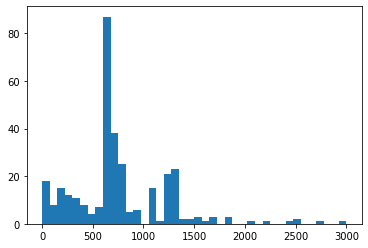

In [65]:
plt.hist(dnd_sales_df["Sales_total"], bins=40)
plt.show()

In [66]:
# creat a condition that give zip codes that are above the mode
dnd_sales_df["Sales_total"].mode()

0    600
dtype: int64

In [67]:
# zip code needs to be checked I think it might have spaces and stuff.
dnd_sales_df["zip_code"].value_counts()

32218    19
32246    15
32258    15
32256    15
32216    14
         ..
32033     1
31169     1
32656     1
32227     1
32135     1
Name: zip_code, Length: 76, dtype: int64

In [68]:
dnd_sales_df["zip_code"] = dnd_sales_df["zip_code"].str.strip()

In [69]:
dnd_sales_df["zip_code"] = dnd_sales_df["zip_code"].astype("category")

In [70]:
dnd_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 423
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_of_PreShoot  325 non-null    datetime64[ns]
 1   Session_Fee       325 non-null    int64         
 2   Hair              325 non-null    object        
 3   DOB               324 non-null    datetime64[ns]
 4   zip_code          325 non-null    category      
 5   Sales_total       325 non-null    int64         
 6   Model Release     317 non-null    object        
 7   Favorite          325 non-null    object        
dtypes: category(1), datetime64[ns](2), int64(2), object(3)
memory usage: 33.7+ KB


In [71]:
dnd_sales_df["Favorite"].value_counts()


no preference               158
butt                         59
boobs                        32
legs                          9
butt, eyes                    7
eyes                          7
boobs, legs                   5
butt                          2
butt, legs                    2
boobs, eyes                   2
thighs                        1
back, eyes, neck              1
boobs, curves                 1
eyes,  legs                   1
eyes, legs                    1
boobs, shoulder               1
chest, eyes, neck             1
butt, curves, face            1
boob, smile                   1
boob                          1
butt, decoletage              1
back, butt, legs              1
back, butt                    1
boob, legs                    1
legs, shoulder, smile         1
legs, pale_skin               1
eyes, smile                   1
legs, feet                    1
hips                          1
butt, curves                  1
waist                         1
butt, de

In [80]:
# lets' see what happens if I strip it
dnd_sales_df["Favorite"].str.strip().nunique()

56

In [85]:
dnd_sales_df.loc[:, "Sales_total"].sum()/6

39980.166666666664

In [91]:
dnd_sales_df.loc[:, "Sales_total"].mean()/9

82.0105982905983

In [67]:
hi_sales = dnd_sales_df["Sales_total"] >= 1200
hi_sales.value_counts()

False    260
True      65
Name: Sales_total, dtype: int64

In [68]:
# the highest sales zip codes

dnd_highest_codes_df = dnd_sales_df[hi_sales]
dnd_highest_codes_df.shape

(65, 8)

In [ ]:
low_sale_zcodes = dnd_sales_df["Sales_total"] <= 500
low_sale_zcodes.value_counts()

False    253
True      72
Name: Sales_total, dtype: int64

In [ ]:
# The lowest sales zip codes
dnd_lowest_codes_df = dnd_sales_df[low_sale_zcodes]
dnd_lowest_codes_df.describe()

,Session_Fee,Sales_total
count,72.000000,72.000000
mean,86.569444,180.541667
std,36.490333,142.707219
min,0.000000,0.000000
25%,99.000000,60.000000
50%,99.000000,160.000000
75%,99.000000,305.000000
max,179.000000,440.000000


In [ ]:
dnd_highest_codes_df.describe()

,Session_Fee,Sales_total
count,65.000000,65.000000
mean,110.723077,1467.015385
std,45.380168,403.523369
min,25.000000,1200.000000
25%,99.000000,1200.000000
50%,99.000000,1320.000000
75%,99.000000,1550.000000
max,179.000000,3000.000000


In [ ]:
dnd_highest_codes_df.nunique()

Date_of_PreShoot    60
Session_Fee          3
Hair                 2
DOB                 64
zip_code            37
Sales_total         21
Model Release        3
Favorite            19
dtype: int64

In [ ]:
dnd_sales_df.nunique()

Date_of_PreShoot    266
Session_Fee           7
Hair                  2
DOB                 316
zip_code             76
Sales_total          68
Model Release         4
Favorite             57
dtype: int64

In [ ]:
dnd

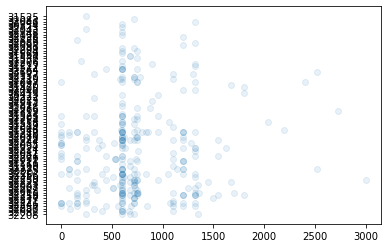

In [ ]:
plt.scatter(dnd_sales_df["Sales_total"], dnd_sales_df["zip_code"], alpha=.1)
plt.show()

# I need to find a better way to show this graph.  I like that it splits the 
# sales data geographically, but the level is granularity is too much

In [ ]:
dnd_highest_codes_df["zip_code"].value_counts()

32258    8
32224    4
32218    4
32225    3
32216    3
32211    3
32223    2
32246    2
32040    2
32097    2
32226    2
32257    2
32256    2
32244    2
32207    2
32405    1
31520    1
31558    1
32312    1
32277    1
31548    1
32063    1
32135    1
32137    1
31522    1
32003    1
32208    1
32095    1
78413    1
33605    1
32250    1
32073    1
32065    1
32217    1
32046    1
32259    1
32011    1
Name: zip_code, dtype: int64

In [ ]:
dnd_highest_codes_df["Hair"].value_counts()

no     45
yes    20
Name: Hair, dtype: int64

In [ ]:
dnd_lowest_codes_df["zip_code"].value_counts()

32246    7
32218    5
32225    4
32226    3
32205    3
32256    3
32034    3
32257    3
32211    2
32073    2
32080    2
32250    2
32065    2
32068    2
32003    2
32086    2
32224    2
32258    2
32244    2
32277    1
31525    1
32207    1
32081    1
32082    1
32137    1
32219    1
32216    1
32206    1
3220?    1
32223    1
32097    1
32092    1
32164    1
32221    1
32043    1
32656    1
32227    1
32208    1
Name: zip_code, dtype: int64

In [ ]:
dnd_lowest_codes_df["Hair"].value_counts()

no     56
yes    16
Name: Hair, dtype: int64

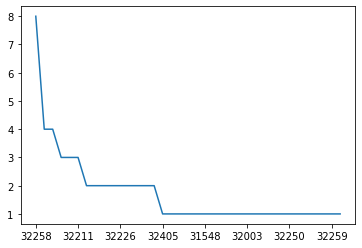

In [ ]:
dnd_highest_codes_df["zip_code"].value_counts().plot()

In [ ]:
# cross tab - I will need to bin /cut the Sales sessions to do an evocative crosstab
# but I can try it now, just to see
# based on this I need to bin the Sales into maybe 5 categories. 
# and bin the zip codes into 2/4/8 categories

cross=pd.crosstab(dnd_sales_df["Sales_total"], dnd_sales_df["Hair"])
cross

Hair,no,yes
Sales_total,,
0,14,4
80,5,2
90,1,0
160,13,1
200,1,0
...,...,...
2200,1,0
2400,0,1
2520,1,1


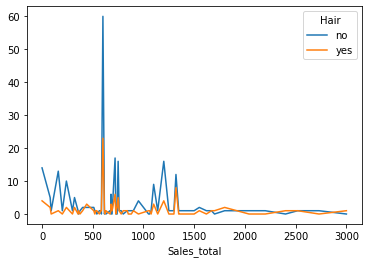

In [ ]:
cross.plot();

In [ ]:
# lets check the sales data for the hair and no hair groups
cond_mu_only = dnd_sales_df["Hair"] == "no"
cond_wHair = dnd_sales_df["Hair"] == "yes"


dnd_makeup_only_df = dnd_sales_df[cond_mu_only]
dnd_w_hair_df = dnd_sales_df[cond_wHair]

In [ ]:
dnd_makeup_only_df.describe() # 

,Session_Fee,Sales_total
count,231.000000,231.000000
mean,92.380952,711.567100
std,42.195223,455.453347
min,0.000000,0.000000
25%,99.000000,515.000000
50%,99.000000,600.000000
75%,99.000000,950.000000
max,249.000000,2730.000000


In [ ]:
dnd_w_hair_df.describe() # this result is very interesting.  it implies clients 
# who get hair done spend and average of $100 more!
# plus we work one hour less! and the morale of the team improves because the 
# stylist gets paid more. 

,Session_Fee,Sales_total
count,94.000000,94.000000
mean,107.180851,803.287234
std,45.255300,518.220438
min,0.000000,0.000000
25%,99.000000,600.000000
50%,99.000000,679.500000
75%,99.000000,1057.500000
max,249.000000,3000.000000


<function matplotlib.pyplot.show>

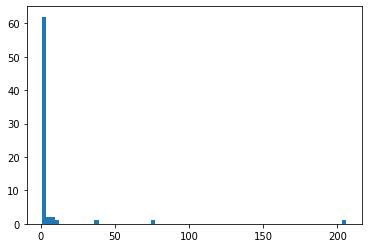

In [ ]:
#lets graph the distribution with a histogram

plt.hist(x=dnd_df["Favorite"].value_counts(), bins=70)
plt.show